#Student Name: Garret Molloy
#Student ID: 9021906

In [158]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import array as arr
import os

Dealing Cards for Blackjack:

Check which hand is best to stick at when the dealer is showing a 10

So I will set up the player’s hand (cycling through all possibilities for 2 cards)

Then assume the dealer has a 10 showing - should the Player Take another card or not?

By running a Monte Carlo simulation - with the player playing against the dealer 100 times for very possible player hand and for other simulations 1,000 times and also playing 10,000 times with each of the different hand combinations.

For each Simulation I calculate the win percentage for each hand possibility and save the result to a CSV file for slicing and dicing later.

I run this Monte Carlo Simulation multiple times for different attempt numbers (100, 1000 & 10,000 plays) adding all the results to the same csv file.

I plot the averages on a histogram - for the 100 plays, the 1,000 plays and the 10,000 plays for a specific hand - this should indicate that with more attempts in the Monte Carlo Simulation that the results are more accurate and there is less deviation in the results calculated each time.

Finally, I run the same Monte Carlo Simulation with the player taking one card.
Again saving the results to a CSV File.

Now I can compare for any given hand, the win and draw percentages if the player takes no more cards versus the win/draw percentages if they do take another card.

Now the player can look up the comparison to see whether there is a higher percentage of winning if they take a card or do not take a card.




In [241]:
# All possible starting Hand combinations
possible_starting_hands_by_total = [
       [[1,1],[2,10],[3,9],[4,8],[5,7],[6,6]],
       [[1,2],[3,10],[4,9],[5,8],[6,7]],
       [[1,3],[4,10],[5,9],[6,8],[7,7]],
       [[1,4],[5,10],[6,9],[7,8]],
       [[1,5],[6,10],[7,9],[8,8]],
       [[1,6],[7,10],[8,9]],
       [[1,7],[8,10],[9,9]],
       [[1,8],[9,10]],
       [[1,9],[10,10]],
       [[1,10]]]

# Class to create and manage the deck, and perform the shuffle and playing actions and to check who wins
class BlackJack:
    def __init__(self, number_of_decks = 1):
        self.new_deck(number_of_decks)
        
    def new_deck(self, number_of_decks = 1):
        # Create deck of cards 4 suits of 13 cards
        one_deck = []
        one_suit = arr.array('I', [value for value in range(1, 11)]) # Cards 1 to 10 (1 = Ace)
        one_suit += arr.array('I', [10, 10, 10]) # Jack, Queen & Kings are valued at 10
        # 52 cards
        for i in range(4):
            one_deck += one_suit
            
        # do we want a single deck or a multideck(casino)
        # print("We are using ", number_of_decks, " decks")
        if(number_of_decks == 1):
            self.deck = one_deck
        else:
            multi_deck = []
            for i in range (number_of_decks - 1):
                multi_deck += one_deck
            self.deck = multi_deck
        # print("Created Deck: ", self.deck)
        
    def shuffle_deck(self):
        random.shuffle(self.deck)
        # print("Shuffeld deck: ", self.deck)

    def smart_total(self, hand):
        # Calculate the highest possible value for a hand
        hand_total = 0
        # Sort largest card first, 
        # so we can check whether last Ace should be 1 or 11
        hand.sort(reverse=True) 
        aces = hand.count(1) # How many Aces in the hand
        if(aces>0): # An Ace in the hand
            hand = hand[:-1] # Strip out one Ace
        hand_total = sum(value for value in hand)
        if(aces>0): # becasue there is an Ace 
            # I need add the Ace as it was stripped out
            new_total = hand_total + 11
            if(new_total <= 21): # check not bust
                return new_total
            # If Ace as 11 makes us Bust then reduce to 1
            else:
                return hand_total + 1
        return hand_total
        
    def did_i_win(self, my_hand, dealers_hand):
        my_total = self.smart_total(my_hand)
        if(my_total>21): 
            return "lose"
        dealers_total = self.smart_total(dealers_hand)
        if(dealers_total>21):
            return "win"
        elif(my_total>dealers_total):
            return "win"
        elif (my_total<dealers_total):
            return "lose"
        else: 
            return "draw"

    def remove_cards(self, card_list):
        # remove any cards from the deck
        # the card_list are the cards to be removed
        for card in card_list:
            self.deck.remove(card)
            
    def play_game_I_stick(self, my_hand, dealers_hand):
        # The dealer plays until they achieve 17 or go bust
        
        my_total = self.smart_total(my_hand)
        # print("My hand: ", my_hand, " = ", my_total)
        if(my_total>21):
            return "lose"
        
        i = 0
        # print("Dealers Hand: ", dealers_hand)
        # Dealer takes cards until they add to 17
        while (self.smart_total(dealers_hand)<17):
            dealers_hand.append(self.deck[i])
            i +=1
            # print("Dealer Takes ", i, " Card: ", dealers_hand)
            
        # When the dealer is finished we see who won
        return self.did_i_win(my_hand, dealers_hand)
        

In [301]:
# BlackJack probability Calculator

# When shown my hand and the dealers face card should I stick or take a card
# What is the probability I will win if I take no more cards

# Psudeo code to calculate

# Select players hand (from full combination of all possiblities)
# Select Dealers face card - 10 initially
# Then auto play for the dealer to see if I would win if I took no more cards


# Experiment: If I stick on 12 - what are the probabilities I win?
# Expanded to include all hand possibilities that add to 12
# Expanded for hands totaling from 12 to 20 (as with 21 I stick!)

# This could be expanded to tell the player what is the best approach 
# when presented with a ahnd and a dealers card

# Alternate - if I hit 1 - will my percentage be better
# Alternate - If I hit what number should I stick at to have best probability

# Would my percenatge win rate differ if I take a card for 12?


import time
import csv

# Create deck
bj = BlackJack()


# Perform Monte Carlo with a numberhand and a randomly shuffled deck
# Perfom this a number of times to calculate average winning percentage
# record results in csv files for processing

#attempts =  How many times to run the simulation with x number of tries
attempts = 1  

# tries = he numbner of times the same hand is played
tries = 100 

# Data file for all results
filename = "results.csv"
new_file = True
if(os.path.exists(filename)):
    # print("File exists")
    new_file = False
f = open(filename, "a")
writer = csv.writer(f)

# format of CSV entries
# hand_category, hand, tries, win, draw
if(new_file):
    # print("Writing Header keys ########################")
    writer.writerow(["hand_category", "hand", "tries", "win", "draw"])

means_wins = np.array([])
means_draws = np.array([])

print("Starting...")

# do calculationfor tries this many times
for xxx in range(attempts):
    
    for category_hands in possible_starting_hands_by_total:
        # Each category has a common total, such as hands adding to 12, hands adding to 13 etc.
        category_total = bj.smart_total(category_hands[0])

        print("=======================================================")    
        print("For hands adding to ", category_total, ":")

        # reset category means for this category
        attempts_wins = np.array([])
        attempts_draws = np.array([])
        hand_number = 1
        # For every hand possibility
        for my_hand in category_hands:

            # For this hand 
            # print("My Hand: ", my_hand)
            dealers_hand = [10]
            bj.new_deck() 
            bj.remove_cards(my_hand + dealers_hand)
            # print(bj.deck)

            #reset wins for this attempt
            wins = 0
            draws = 0
            for i in range(tries):

                # shuffle remaining cards
                bj.shuffle_deck()

                # Dealer plays until sticks or busts
                dealers_hand = [10] #reset dealers hand
                result = bj.play_game_I_stick(my_hand,dealers_hand)

                # print(result)
                if(result=="win"):
                    wins += 1
                elif(result=="draw"):
                    draws += 1

            percentage_wins = (wins/tries*100)
            percentage_draws = (draws/tries*100)

            print("If your hand is {:7} for {} tries the win rate is {:6.2f}% and the draw rate {:6.2f}%".format(str(my_hand), tries, percentage_wins, percentage_draws))
            attempts_wins = np.append(attempts_wins, percentage_wins)
            attempts_draws = np.append(attempts_draws, percentage_draws)

            # csv format
            # hand_category, hand, tries, win, draw
            writer.writerow([bj.smart_total(my_hand), hand_number, tries, percentage_wins, percentage_draws])
            hand_number += 1

        win_mean = np.mean(attempts_wins)
        draw_mean = np.mean(attempts_draws)

        print("If you have a hand totaling {} the Average Win is {:6.2f}% and a Draw is {:6.2f}%".format(category_total, win_mean, draw_mean))


print("Finshed!")
f.close()
    

Starting...
For hands adding to  12 :
If your hand is [1, 1]  for 100 tries the win rate is  21.00% and the draw rate   0.00%
If your hand is [10, 2] for 100 tries the win rate is  19.00% and the draw rate   0.00%
If your hand is [9, 3]  for 100 tries the win rate is  21.00% and the draw rate   0.00%
If your hand is [8, 4]  for 100 tries the win rate is  19.00% and the draw rate   0.00%
If your hand is [7, 5]  for 100 tries the win rate is  27.00% and the draw rate   0.00%
If your hand is [6, 6]  for 100 tries the win rate is  23.00% and the draw rate   0.00%
If you have a hand totaling 12 the Average Win is  21.67% and a Draw is   0.00%
For hands adding to  13 :
If your hand is [2, 1]  for 100 tries the win rate is  19.00% and the draw rate   0.00%
If your hand is [10, 3] for 100 tries the win rate is  18.00% and the draw rate   0.00%
If your hand is [9, 4]  for 100 tries the win rate is  27.00% and the draw rate   0.00%
If your hand is [8, 5]  for 100 tries the win rate is  20.00% an

Load the large File with panda.

The file is a culmination of mutliple runs, of different simultion sizes, all appended to the same file.

The file was created by calculating for each hand the win & draw percentage when played 100 times, 1000 tmies and 10,000 times.

I ran several runs of each. So a few runs of every hand with 100 plays and a few runs of every hand with a 1000 plays and a few runs with 10,000 plays.

With the win, draw percentages for each possible hand in a single results file.



In [302]:
from pandas import read_csv


filename = "results.csv"

df = read_csv(filename)
dataset = df.values

Now that we have loaded the file with all the runs for all the hands. 
We can slice and dice for various goals.

In the file we have the win and draw % with multiple runs for playing every hand 100 times, 1000 times and 10,000 times.

For each hand played 100 times, I get the average win % & draw % and record this in the data file as a row 
and run it again for another row.

For each run of 1000 and 10000 I also get the average win and draw % ad a row for each run of this for every hand.

First to plot the variation of average percentage for a single hand.

So with a small sample (100 plays) I expect the averages to vary wildly. [1]

With larger samples (1000 plays of that hand) I expect average win % to vary much less with each run, so I will plot each run average for a hand. [2]

And for average win percentages of 10000 plays, I expect these would be all very similar, as it is from a much larger population. [3]

I have chosen just 1 hand to demonstrate this.

Going forward the data can be used for every hand to present the player with valuable information of when to ask for another card or not.


[1 GREEN] We should see large variation given each sample was small...
Mean:  20.96638655462185 %
Var:  16.083606323885476 %
STD:  4.01043717366143 %

[2 BLUE] We should see smaller variation given each sample was large...
Mean:  20.91333333333333 %
Var:  1.2322298850574716 %
STD:  1.1100585052408145 %

[3 RED] We expect tiny variation given each sample was huge...
Mean:  21.27285714285714 %
Var:  0.12576250000000005 %
STD:  0.35463008896595344 %



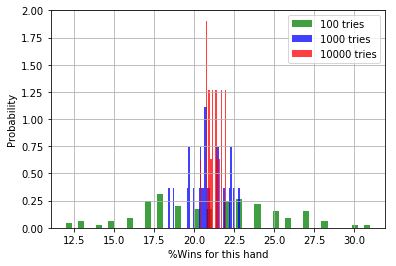

In [303]:
# For each of these ropws for a given hand - calcuate the variations (standard deviation)
# We should see reduced variation with larger simulations

# CSV format = dataframe keys
# hand_category, hand, tries, win, draw

def graph(hand_category, tries, hand, colour):  
    mean_wins = df.loc[(df['hand_category']==hand_category) & (df['tries']==tries) & (df['hand']==hand)]
    # print(mean_wins.count())
    dfList = mean_wins['win'].tolist()

    # the histogram of the data
    tries_label = str(tries) + " tries"
    n, bins, patches = plt.hist(dfList, 50, density=True, facecolor=colour, alpha=0.75, label=tries_label)

    plt.xlabel("%Wins for this hand")
    plt.ylabel('Probability')
    plt.axis(ymax=2)
    plt.grid(True)

    print("Mean: ", mean_wins['win'].mean(), "%")
    print("Var: ", mean_wins['win'].var(), "%")
    print("STD: ", mean_wins['win'].std(), "%\n")
    

print("[1 GREEN] We should see large variation given each sample was small...")
graph(12,100,2, 'green')

print("[2 BLUE] We should see smaller variation given each sample was large...")
graph(12,1000,2, 'blue')
    
print("[3 RED] We expect tiny variation given each sample was huge...")
graph(12,10000,2, 'red')
 

plt.legend()
plt.show()



Player Guide

Show the percentages for not taking another card if the dealer has 10


In [307]:
print("Starting...")


    
for category_hands in possible_starting_hands_by_total:
    # Each category has a common total, such as hands adding to 12, hands adding to 13 etc.
    
    category_total = bj.smart_total(category_hands[0])

    #print("=======================================================")    
    #print("For hands adding to ", category_total)

    # reset category means for this category
    attempts_wins = np.array([])
    attempts_draws = np.array([])
    hand_number = 1
    # For every hand possibility
    for my_hand in category_hands:
        # select from the dataframe all results for this hand (only for 10000 tries)
        all_attempts_for_this_hand = df.loc[(df['tries'] == 10000) 
                                            & (df['hand_category']==category_total) 
                                            & (df['hand']==hand_number)]
        
        # Note the current results are for when the dealer has a 10
        # We shoul dexpand the prgram above to get teh values for each dealer hand possibility [A-K]
        dealers_hand = [10]

        print("For Hands adding to {} {:7} Average Win = {:6.2f}%".format(category_total, 
                                                                         str(my_hand), 
                                                                         all_attempts_for_this_hand['win'].mean()))
        hand_number += 1


#print("For BJ we calculate Win: ", game_win_mean, "%  Draw: ", game_draw_mean, "%")


Starting...
For Hands adding to 12 [1, 1]  Average Win =  22.59%
For Hands adding to 12 [10, 2] Average Win =  21.27%
For Hands adding to 12 [9, 3]  Average Win =  21.21%
For Hands adding to 12 [8, 4]  Average Win =  21.44%
For Hands adding to 12 [7, 5]  Average Win =  21.72%
For Hands adding to 12 [6, 6]  Average Win =  20.61%
For Hands adding to 13 [2, 1]  Average Win =  21.69%
For Hands adding to 13 [10, 3] Average Win =  21.07%
For Hands adding to 13 [9, 4]  Average Win =  21.32%
For Hands adding to 13 [8, 5]  Average Win =  21.60%
For Hands adding to 13 [7, 6]  Average Win =  21.52%
For Hands adding to 14 [3, 1]  Average Win =  21.64%
For Hands adding to 14 [10, 4] Average Win =  21.12%
For Hands adding to 14 [9, 5]  Average Win =  21.51%
For Hands adding to 14 [8, 6]  Average Win =  21.41%
For Hands adding to 14 [7, 7]  Average Win =  22.51%
For Hands adding to 15 [4, 1]  Average Win =  21.61%
For Hands adding to 15 [10, 5] Average Win =  21.14%
For Hands adding to 15 [9, 6]  Ave


We will now calcualte the percentages win probability if the player takes a card.

TODO: Wrap funciton to avoid duplication

Run multiple times to start a new CSV file 

We can then compare result afterward.

In [308]:
# With the sma estarting Hands 
# TAKE A CARD this time!!
# And compare results to the above

# Perform Monte Carlo with a numberhand and a randomly shuffled deck
# Perfom this a number of times to calculate average winning percentage
# record results in csv files for processing

attempts = 10
tries = 100

filename = "results_take1.csv"
new_file = True
if(os.path.exists(filename)):
    # print("not new")
    new_file = False
f = open(filename, "a")
writer = csv.writer(f)

# started to do wrtie out stats for later analysis - this would be helpful after multiple ling runs of the code

# format of CSV entries
# hand_category, hand, tries, win, draw
if(new_file):
    print("Writing Header ########################")
    writer.writerow(["hand_category", "hand", "tries", "win", "draw"])


print("Starting...")

# do calculationfor tries this many times
for xxx in range(attempts):
    
    for category_hands in possible_starting_hands_by_total:
        # Each category has a common total, such as hands adding to 12, hands adding to 13 etc.
        category_total = bj.smart_total(category_hands[0])

        #print("=======================================================")    
        #print("For hands adding to ", category_total)

        # reset category means for this category

        hand_number = 1
        # For every hand possibility
        for my_hand in category_hands:
            # For this hand 
            # print("My Hand: ", my_hand)
            dealers_hand = [10]
            bj.new_deck() 
            bj.remove_cards(my_hand + dealers_hand)
            # print(bj.deck)

            #reset wins for this attempt
            wins = 0
            draws = 0
            for i in range(tries):

                # shuffle remaining cards
                bj.shuffle_deck()

                # Amendment - Take a Card
                my_new_card = bj.deck[-1]
                my_new_hand = my_hand.copy()
                my_new_hand.append(my_new_card)
                # print("My new hand: ", my_hand, my_new_hand)
                
                # Dealer plays until sticks or busts
                dealers_hand = [10] #reset dealers hand
                result = bj.play_game_I_stick(my_new_hand,dealers_hand)

                # print(result)
                if(result=="win"):
                    wins += 1
                elif(result=="draw"):
                    draws += 1


            percentage_wins = (wins/tries*100)
            percentage_draws = (draws/tries*100)

            # csv format
            # hand_category, hand, tries, win, draw
            writer.writerow([bj.smart_total(my_hand), hand_number, tries, percentage_wins, percentage_draws])
            hand_number += 1


print("Finshed!")
f.close()

Starting...
Finshed!


The Code above checked the win percentages if we took a card and storage the ining percetnages to a CSV file

Now we need to load this into a new dataframe

So we can prepare the results



In [309]:
filename = "results_take1.csv"

df2 = read_csv(filename)
dataset = df2.values

Compare if we stick ot hit... 

That is to not take a card or take a card



In [310]:
for category_hands in possible_starting_hands_by_total:
    # Each category has a common total, such as hands adding to 12, hands adding to 13 etc.
    
    category_total = bj.smart_total(category_hands[0])

    #print("=======================================================")    
    #print("For hands adding to ", category_total)

    # reset category means for this category
    attempts_wins = np.array([])
    attempts_draws = np.array([])
    hand_number = 1
    # For every hand possibility
    for my_hand in category_hands:
        # select from the dataframe all results for this hand (only for 10000 tries)
        all_attempts_for_this_hand = df.loc[(df['tries'] == 10000) 
                                            & (df['hand_category']==category_total) 
                                            & (df['hand']==hand_number)]
        all_attempts_for_this_hand2 = df2.loc[(df2['tries'] == 10000) 
                                            & (df2['hand_category']==category_total) 
                                            & (df2['hand']==hand_number)]       
        # Note the current results are for when the dealer has a 10
        # We shoul dexpand the prgram above to get teh values for each dealer hand possibility [A-K]
        dealers_hand = [10]
        #print(all_attempts_for_this_hand)
        #print(all_attempts_for_this_hand2)
        stick_pct = all_attempts_for_this_hand['win'].mean()
        stick_dpct = all_attempts_for_this_hand['draw'].mean()
        hit_pct   = all_attempts_for_this_hand2['win'].mean()
        hit_dpct   = all_attempts_for_this_hand2['draw'].mean()
        mean_stick = "{0:5.2f}/{1:5.2f}".format(stick_pct,stick_dpct)
        mean_hit   = "{0:5.2f}/{1:5.2f}".format(hit_pct,hit_dpct)
        hand_text = "Hands({}) {:8}: ".format(category_total, str(my_hand))
        total_text = hand_text + " stick:" + mean_stick + "%, take card:" + mean_hit + "% ==> "
        if(hit_pct >= stick_pct):
            total_text += "To win:    HIT"
        else:
            total_text += "To win:  Stick"
        if(hit_pct+hit_dpct >= stick_pct + stick_dpct):
            total_text += "   To win/draw:    HIT"
        else:
            total_text += "   To win/draw:  Stick"            
            
        print(total_text)
        hand_number += 1


#print("For BJ we calculate Win: ", game_win_mean, "%  Draw: ", game_draw_mean, "%")

Hands(12) [1, 1]  :  stick:22.59/ 0.00%, take card:34.09/ 6.35% ==> To win:    HIT   To win/draw:    HIT
Hands(12) [10, 2] :  stick:21.27/ 0.00%, take card:26.06/ 6.49% ==> To win:    HIT   To win/draw:    HIT
Hands(12) [9, 3]  :  stick:21.21/ 0.00%, take card:24.14/ 6.24% ==> To win:    HIT   To win/draw:    HIT
Hands(12) [8, 4]  :  stick:21.44/ 0.00%, take card:24.89/ 5.83% ==> To win:    HIT   To win/draw:    HIT
Hands(12) [7, 5]  :  stick:21.72/ 0.00%, take card:25.19/ 6.04% ==> To win:    HIT   To win/draw:    HIT
Hands(12) [6, 6]  :  stick:20.61/ 0.00%, take card:24.80/ 5.97% ==> To win:    HIT   To win/draw:    HIT
Hands(13) [2, 1]  :  stick:21.69/ 0.00%, take card:32.63/ 6.43% ==> To win:    HIT   To win/draw:    HIT
Hands(13) [10, 3] :  stick:21.07/ 0.00%, take card:24.22/ 6.68% ==> To win:    HIT   To win/draw:    HIT
Hands(13) [9, 4]  :  stick:21.32/ 0.00%, take card:24.61/ 6.13% ==> To win:    HIT   To win/draw:    HIT
Hands(13) [8, 5]  :  stick:21.60/ 0.00%, take card:22.3